In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
data_Y = data.target
data_X = data.data

In [4]:
data_X.shape

(569, 30)

In [5]:
data_Y.shape

(569,)

In [6]:
data_Y = data_Y.reshape(data_X.shape[0], 1)

In [7]:
data_Y.shape

(569, 1)

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

c:\users\hashroot\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


0.23822478914115677


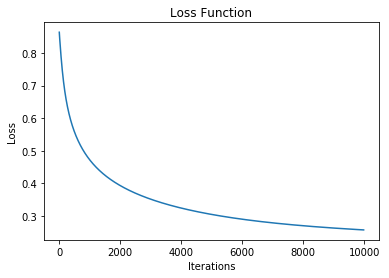

In [12]:
X = data_X
Y = data_Y
numSamples = data_X.shape[0]
numFeatures = data_X.shape[1]
numLabels = data_Y.shape[1]
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numLabels))
b = np.random.normal(loc=0.0, scale=0.01, size=(1, numLabels))

# Hyper Parameters
epochs = 15000
learning_rate = 1e-6
losses = []
for i in range(epochs):
    
    # Model
    z = np.add(np.matmul(X, w), b)
    a = sigmoid(z)
    
    # Loss
    l = np.sum(- (Y*np.log(a) + (1-Y)*np.log(1-a)), axis=0, keepdims=True).T[0][0]/numSamples
    losses.append(l)
    
    dz = a - Y
    dw  = X*dz
    
    # Gradients
    dw = np.sum(dw, axis=0, keepdims=True).T/numSamples
    db = np.sum(dz, axis=0, keepdims=True).T/numSamples
    
    #Update Weights
    w = w - learning_rate*dw
    b = b - learning_rate*db

plt.plot(losses[20:10000])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function')
print(losses[-1])

In [13]:
Y_pred = []
A = []
Z = []
count = 0
for i in range(numSamples):
    z = np.add(np.matmul(X[i].reshape((1,numFeatures)), w), b)
    Z.append(z)
    a = sigmoid(z)
    A.append(a[0][0])
    if a[0][0] >= 0.5 and Y[i] == 1:
        count += 1
        Y_pred.append(1.0)
    if a[0][0] < 0.5 and Y[i] == 0:
        count += 1
        Y_pred.append(0.0)
print('Accuracy : ', count/numSamples*100, '%')
y = np.asarray(Y, dtype=np.int32)

Accuracy :  91.91564147627417 %
